<a href="https://colab.research.google.com/github/takaito1/EAS6305_F24/blob/main/week4/sample_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# sample script for HW4

In [1]:
! pip install gsw
! pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 30.9 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gsw
from cartopy import crs as ccrs
import scipy.interpolate as itp

In [3]:
# obtain the data file
# data URL is https://cchdo.ucsd.edu/data/29476/33AT20120324_hy1.csv
df=pd.read_csv('https://cchdo.ucsd.edu/data/29476/33AT20120324_hy1.csv',skiprows=115,header=1)
df

,EXPOCODE,SECT_ID,STNNBR,CASTNO,SAMPNO,BTLNBR,BTLNBR_FLAG_W,DATE,TIME,LATITUDE,...,14C-DOCERR,13C-DOC,13C-DOC_FLAG_W,13C-DOCERR,SALTREF,SALTREF_FLAG_W,LAB_DEN,LAB_DEN_FLAG_W,BTL_DATE,BTL_TIME
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,/MILLE,/MILLE,NaN,/MILLE,G/KG,NaN,KG/M^3,NaN,NaN,NaN
1,33AT20120324,A22,1.0,2.0,8.0,8.0,2.0,20120325.0,321.0,40.0112,...,-999,-999,9.0,-999,33.6081,2.0,-999,9.0,20120325.0,341.0
2,33AT20120324,A22,1.0,2.0,7.0,7.0,2.0,20120325.0,321.0,40.0112,...,-999,-999,9.0,-999,34.5097,2.0,-999,9.0,20120325.0,339.0
3,33AT20120324,A22,1.0,2.0,6.0,6.0,2.0,20120325.0,321.0,40.0112,...,-999,-999,9.0,-999,34.8579,2.0,-999,9.0,20120325.0,336.0
4,33AT20120324,A22,1.0,2.0,5.0,5.0,2.0,20120325.0,321.0,40.0112,...,-999,-999,9.0,-999,35.4576,2.0,-999,9.0,20120325.0,333.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2648,33AT20120324,A22,81.0,1.0,4.0,4.0,2.0,20120414.0,921.0,12.6031,...,-999,-999,9.0,-999,36.5198,2.0,-999,9.0,20120414.0,926.0
2649,33AT20120324,A22,81.0,1.0,3.0,3.0,2.0,20120414.0,921.0,12.6031,...,-999,-999,9.0,-999,36.2925,2.0,-999,9.0,20120414.0,925.0
2650,33AT20120324,A22,81.0,1.0,2.0,2.0,2.0,20120414.0,921.0,12.6031,...,-999,-999,9.0,-999,36.0625,2.0,-999,9.0,20120414.0,923.0
2651,33AT20120324,A22,81.0,1.0,1.0,1.0,2.0,20120414.0,921.0,12.6031,...,-999,-999,9.0,-999,35.9220,2.0,-999,9.0,20120414.0,921.0


In [4]:
# extract the data : T, S, P, LON, LAT, STNNBR
#
T = df['CTDTMP'][1:].to_numpy().astype(float)
S = df['CTDSAL'][1:].to_numpy().astype(float)
P = df['CTDPRS'][1:].to_numpy().astype(float)
LON = df['LONGITUDE'][1:].to_numpy().astype(float)
LAT = df['LATITUDE'][1:].to_numpy().astype(float)
STN = df['STNNBR'][1:].to_numpy().astype(float)
bot = df['DEPTH'][1:].to_numpy().astype(float)

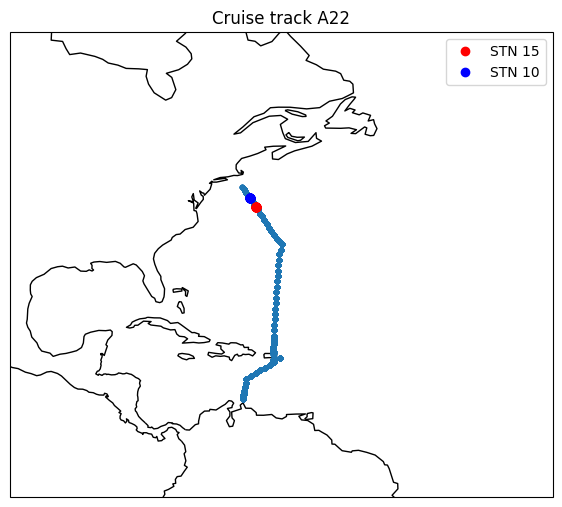

In [6]:
# generate a map for the cruise track
#
fig=plt.figure(figsize=(7,7))
ax=fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.set_extent([-100, -30, 0, 60], ccrs.PlateCarree())
ax.plot(LON,LAT,'.-',linewidth=0.5)
ax.plot(LON[STN==15],LAT[STN==15],'o',color='r',label='STN 15')
ax.plot(LON[STN==10],LAT[STN==10],'o',color='b',label='STN 10')
ax.coastlines()
ax.set_title('Cruise track A22')
plt.legend()

In [7]:
# calculate the SA, CT and dynamic height at Station 10 and 20
#
g=9.8
#
Pn=P[STN==10]
Tn=T[STN==10]
Sn=S[STN==10]
SAn=gsw.SA_from_SP(Sn,Pn,LON[STN==10],LAT[STN==10])
CTn=gsw.CT_from_t(Sn,Tn,Pn)
Zn = gsw.geo_strf_dyn_height(SAn,CTn,Pn,2000)/g
#
Ps=P[STN==15]
Ts=T[STN==15]
Ss=S[STN==15]
SAs=gsw.SA_from_SP(Ss,Ps,LON[STN==15],LAT[STN==15])
CTs=gsw.CT_from_t(Ss,Ts,Ps)
#
# calculate dynamic height w.r.t the 2000 dbar reference pressure
Zs = gsw.geo_strf_dyn_height(SAs,CTs,Ps,2000)/g

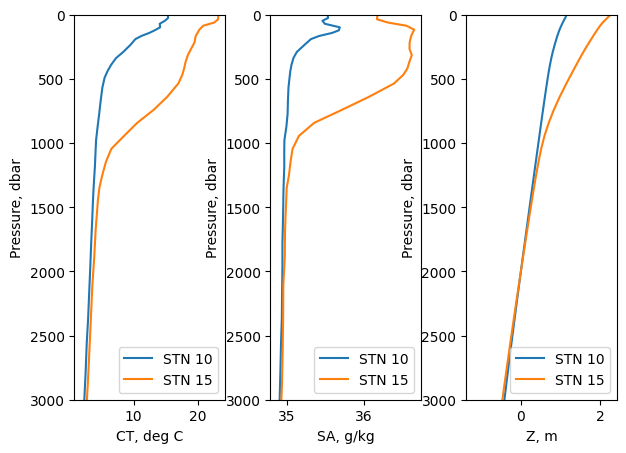

In [8]:
fig=plt.figure(figsize=(7,5))
ax=fig.subplots(1,3)
plt.subplots_adjust(wspace=.3)
#
# Temperature
ax[0].plot(CTn,Pn,label='STN 10')
ax[0].plot(CTs,Ps,label='STN 15')
ax[0].set_ylim(3000,0)
ax[0].set_xlabel('CT, deg C')
ax[0].set_ylabel('Pressure, dbar')
ax[0].legend()
#
# Salinity
ax[1].plot(Sn,Pn,label='STN 10')
ax[1].plot(Ss,Ps,label='STN 15')
ax[1].set_ylim(3000,0)
ax[1].set_xlabel('SA, g/kg')
ax[1].set_ylabel('Pressure, dbar')
ax[1].legend()
#
# Dynamic height
ax[2].plot(Zn,Pn,label='STN 10')
ax[2].plot(Zs,Ps,label='STN 15')
ax[2].set_ylim(3000,0)
ax[2].set_xlabel('Z, m')
ax[2].set_ylabel('Pressure, dbar')
ax[2].legend()

In [11]:
# Calculate geostrophic velocity
#
# U = -g/f*dZ/dy
#
# Coriolis parameter
Omeg = 2*np.pi/86400
lat_ave = np.mean([LAT[STN==10][0],LAT[STN==20][0]])
print(f'Average latitude is {lat_ave:.3g}')
#
f = 2*Omeg*np.sin(np.deg2rad(lat_ave))
print(f'Coriolis parameter is {f:.3g}')
#
# To calculate dZ, we need to put them on the same vertical grid
P = np.arange(20,3020,20)
Zni = itp.interp1d(Pn,Zn,'linear')
Zsi = itp.interp1d(Ps,Zs,'linear')
dZ  = Zni(P) - Zsi(P)
#
# estimate the distance between the two stations
R  = 6.3e6 # radius of the earth
dlat = R*np.deg2rad(LAT[STN==10][0] - LAT[STN==15][0])
dlon = R*np.deg2rad(LON[STN==10][0] - LON[STN==15][0])*np.cos(np.deg2rad(lat_ave))
dY = np.sqrt(dlat**2 + dlon**2)
print(f'The distance between the two stations is {dY:.3g}m')
#
# Combining all of the results from above, we get the geostrophic velocity
U = -9.8/f*dZ/dY

Average latitude is 36.9
Coriolis parameter is 8.73e-05
The distance between the two stations is 1.49e+05m


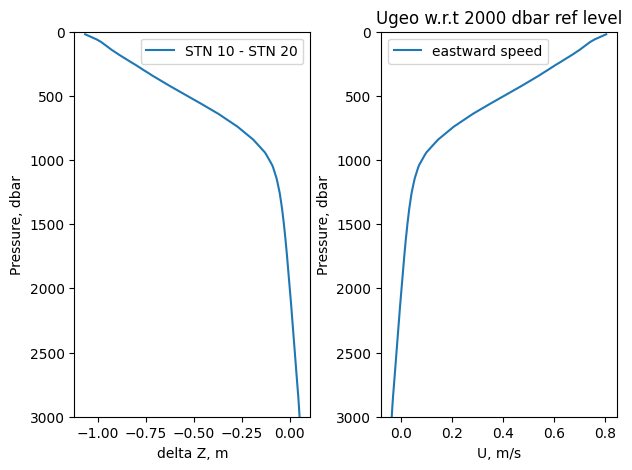

In [16]:
fig=plt.figure(figsize=(7,5))
ax=fig.subplots(1,2)
plt.subplots_adjust(wspace=.3)
#
# Dynamic height difference
ax[0].plot(dZ,P,label='STN 10 - STN 20')
ax[0].set_ylim(3000,0)
ax[0].set_xlabel('delta Z, m')
ax[0].set_ylabel('Pressure, dbar')
ax[0].legend()
#
# Geostrophic velocity
ax[1].plot(U,P,label='eastward speed')
ax[1].set_ylim(3000,0)
ax[1].set_xlabel('U, m/s')
ax[1].set_ylabel('Pressure, dbar')
ax[1].set_title('Ugeo w.r.t 2000 dbar ref level')
ax[1].legend()